

# Exercice 2 - Regression lineaire multiple et inference statistique
### (suite de l'exercice 1 / partie 3)


Dans le probleme suivant, on considere que l'on connait les notes moyennes sur l'année de n eleves dans p matieres, ainsi que leur note a un concours specifique en fin d'annee. On se demande si on ne pourrait pas prédire la note des etudiants au concours en fonction de leur moyenne annuelle afin d'estimer leurs chances au concours.

On va resoudre le probleme a l'aide de la regression lineaire multiple de scikitlearn (et plus a la main) et estimer a quel point les predictions sont precises par inference statistique.



In [11]:

import numpy as np
import matplotlib.pyplot as plt



## Partie 1 -- Apprentissage/prediction :
- Bien comprendre la fonction 'SimulateObservations2'
- A l'aide de la fonction 'SimulateObservations2', simulez un jeu de donnees d'apprentissage [X_l,y_l] avec n_l=30 observations et un jeu de test [X_t,y_t] avec n_t=1000 observations. Les observations seront en dimension p=10.
- Effectuez la regression lineaire multiple avec sklearn.linear_model.LinearRegression
- representez un nuage de points dont chaque point a pour coordonnee (y_true,y_predicted). Les observations test seront utilisees. Calculez de meme la 'mean squared error' sur ces donnees  




The thetas with which the values were simulated are: [0.15223534 0.16232663 0.05972188 0.05684838 0.02980419 0.14299138
 0.14820284 0.02485549 0.05747377 0.16554012]


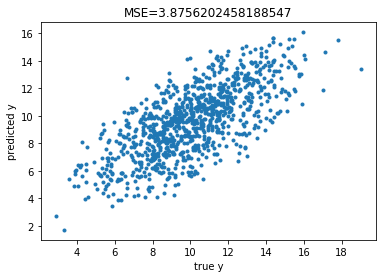

In [12]:

def SimulateObservations2(n_train,n_test,p):
  """
  n_train: number of training obserations to simulate
  n_test: number of test obserations to simulate
  p: dimension of the observations to simulate
  """
  
  ObsX_train=20.*np.random.rand(n_train,p)
  ObsX_tst=20.*np.random.rand(n_test,p)
  
  RefTheta=np.random.rand(p)
  RefTheta=RefTheta/RefTheta.sum()
  print("The thetas with which the values were simulated are: "+str(RefTheta))
  
  ObsY_train=np.dot(ObsX_train,RefTheta.reshape(p,1))+1.5*np.random.randn(n_train,1)
  ObsY_tst=np.dot(ObsX_tst,RefTheta.reshape(p,1))+1.5*np.random.randn(n_test,1)
  
  return [ObsX_train,ObsY_train,ObsX_tst,ObsY_tst,RefTheta]

n=30
p=10
[X_l,y_l,X_t,y_t,RefTheta]=SimulateObservations2(n,1000,p)



from sklearn.linear_model import LinearRegression

LR_regressor = LinearRegression()
LR_regressor.fit(X_l, y_l)

y_pred = LR_regressor.predict(X_t)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_t, y_pred)

plt.plot(y_t, y_pred,'.')
plt.xlabel('true y')
plt.ylabel('predicted y')
plt.title("MSE="+str(MSE))
plt.show()


## Partie 2 -- Inference sur les erreurs : 
On fait l'hypotese que le bruit sur les observations est Gaussien (ce qui est vrai puisqu'on a simule les donnees comme ca). Nous allons alors etudier comment les erreurs d'approximation sont distribuees.

- Utilisez les fonction np.histogram et plt.plot pour representer la distribution de l'erreur d'approximation dans les donnees de la partie 1.
- La distribution de l'erreur est liee a une loi de student a n-p-1 degres de libertes. Nous n'allons pas caller cette loi a nos donnees mais simplement mesurer la moyenne de erreur au carre (MSE - ou biais) dans nos donnees pour evaluer a quel point notre methode est precise.


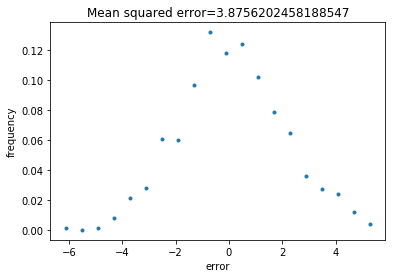

In [13]:
erreurs=(y_t-y_pred)

histo_erreurs=np.histogram(erreurs,bins=20)

MSE=np.mean(erreurs*erreurs)

plt.plot(histo_erreurs[1][:-1], histo_erreurs[0]/np.sum(histo_erreurs[0]),'.')
plt.xlabel('error')
plt.ylabel('frequency')
plt.title('Mean squared error='+str(MSE))
plt.show()


## Partie 3 -- Variations de l'erreur pour differentes valeurs de n ou p : 
- Reproduire les parties 1 et 2 de l'exercice pour different nombres d'observations d'apprentissage (n) et differentes dimensions des observations (p) :
  [Tests 1] : (n=30,p=1) , (n=30,p=5) , (n=30,p=10) , (n=30,p=15) , (n=30,p=20) , (n=30,p=25) , (n=30,p=29)
  [Tests 2] : (n=11,p=10) ,(n=15,p=10) ,(n=20,p=10) ,(n=30,p=10) , (n=60,p=10) , (n=100,p=10)  

Aussi bien pour [Tests 1] que pour [Tests 2], verifiez comment evolue la MSE quand n ou p varie.


In [14]:
def GetMSE(n_train,n_test,p):
  [X_l,y_l,X_t,y_t,RefTheta]=SimulateObservations2(n_train,n_test,p)
  LR_regressor.fit(X_l, y_l)
  y_pred = LR_regressor.predict(X_t)
  
  erreurs=(y_t-y_pred)
  MSE=np.mean(erreurs*erreurs)
  histo_erreurs=np.histogram(erreurs,bins=20)

  plt.plot(histo_erreurs[1][:-1], histo_erreurs[0]/np.sum(histo_erreurs[0]),'.')
  plt.xlabel('error')
  plt.ylabel('frequency')
  plt.title('Mean squared error='+str(MSE))
  plt.show()

  return MSE
  
 

#####  [Tests 1]


The thetas with which the values were simulated are: [1.]


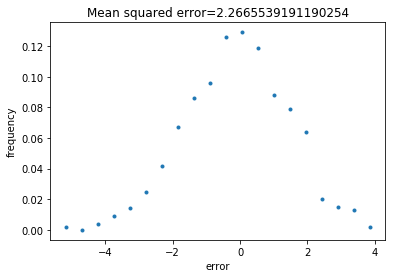

The thetas with which the values were simulated are: [0.24897535 0.04214886 0.54585409 0.02889948 0.13412221]


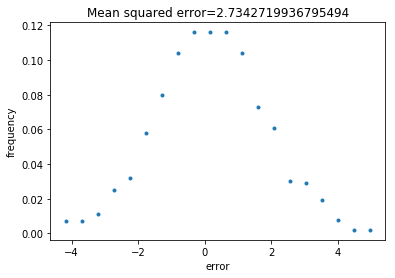

The thetas with which the values were simulated are: [0.09231035 0.08276381 0.13277626 0.01485306 0.1949832  0.10011275
 0.17930465 0.12588235 0.03794185 0.03907173]


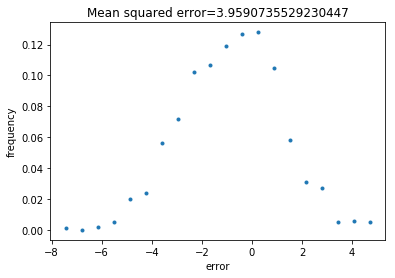

The thetas with which the values were simulated are: [0.12778451 0.09529011 0.06660343 0.00405154 0.07075862 0.1010251
 0.02775793 0.00315998 0.03048128 0.09233898 0.15640334 0.04527316
 0.10849765 0.00232992 0.06824444]


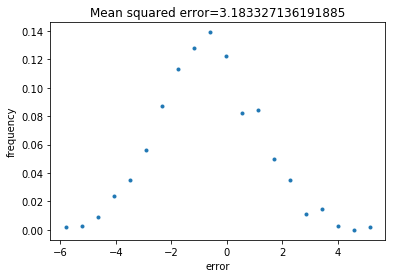

The thetas with which the values were simulated are: [0.07684096 0.03244677 0.0814296  0.04976435 0.04814877 0.03486627
 0.08174602 0.00656519 0.08405512 0.04721303 0.04427303 0.00052109
 0.04276217 0.07937019 0.02975968 0.00917955 0.07631354 0.05867235
 0.05567135 0.06040099]


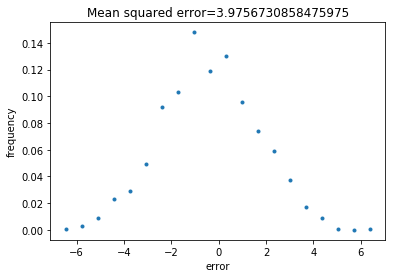

The thetas with which the values were simulated are: [0.02911051 0.03320822 0.03745964 0.05905287 0.05862144 0.00885484
 0.06055253 0.05316596 0.06055668 0.04623443 0.01291791 0.04355177
 0.03215843 0.01236596 0.05456021 0.01728264 0.05857835 0.05073134
 0.0349233  0.04847146 0.02647229 0.0552549  0.01096448 0.05039736
 0.04455249]


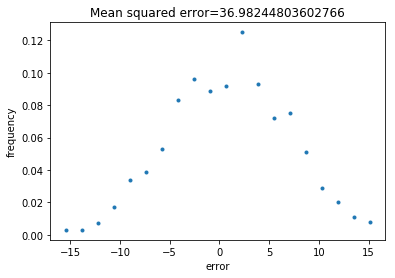

The thetas with which the values were simulated are: [0.01628323 0.04039213 0.06810973 0.02262881 0.01265771 0.00275298
 0.05741855 0.02755748 0.05783474 0.03221435 0.03610366 0.01446327
 0.01752207 0.0294837  0.05138223 0.00083825 0.03372409 0.06813547
 0.03269713 0.04603487 0.0441071  0.03487702 0.04605536 0.0679333
 0.0208449  0.01441762 0.03418716 0.02435033 0.04499274]


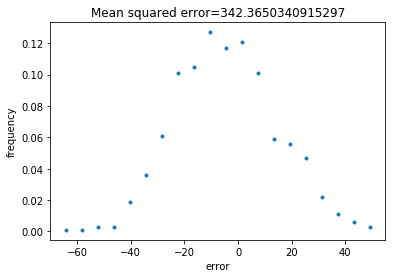

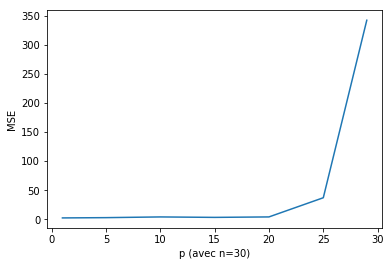

In [15]:
MSE_30_1=GetMSE(30,1000,1)
MSE_30_5=GetMSE(30,1000,5)
MSE_30_10=GetMSE(30,1000,10)
MSE_30_15=GetMSE(30,1000,15)
MSE_30_20=GetMSE(30,1000,20)
MSE_30_25=GetMSE(30,1000,25)
MSE_30_29=GetMSE(30,1000,29)



plt.plot([1,5,10,15,20,25,29],[MSE_30_1,MSE_30_5,MSE_30_10,MSE_30_15,MSE_30_20,MSE_30_25,MSE_30_29])
plt.xlabel('p (avec n=30)')
plt.ylabel('MSE')
plt.show()


#####  [Tests 2]


The thetas with which the values were simulated are: [0.02502376 0.17057606 0.19760819 0.0504536  0.15120186 0.03887483
 0.00277525 0.19961556 0.03171826 0.13215264]


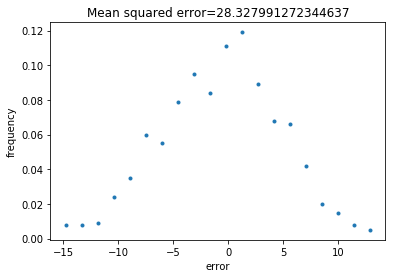

The thetas with which the values were simulated are: [1.84398686e-01 1.03442865e-01 1.43521760e-01 1.31626360e-01
 7.60958763e-05 9.50571073e-02 7.09032141e-03 8.26507901e-02
 1.69506044e-01 8.26299700e-02]


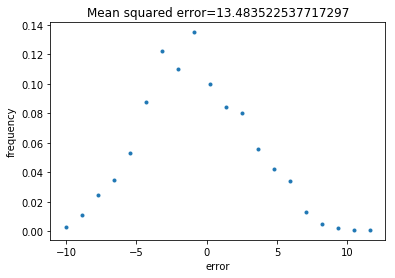

The thetas with which the values were simulated are: [0.12076822 0.08866329 0.03930896 0.09188717 0.11472978 0.10972467
 0.09296192 0.16801842 0.09626332 0.07767423]


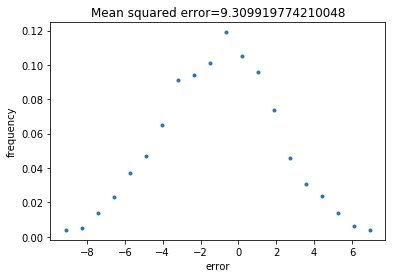

The thetas with which the values were simulated are: [0.08503503 0.16333896 0.05738464 0.16416545 0.09020708 0.10830366
 0.10506071 0.05593526 0.09068297 0.07988623]


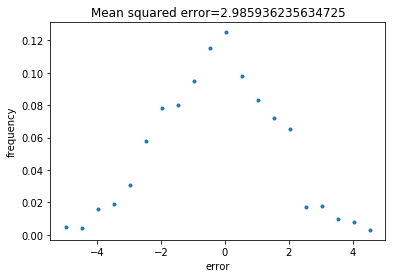

The thetas with which the values were simulated are: [0.05224388 0.10750253 0.00377203 0.02889739 0.22518326 0.17518433
 0.00842389 0.05994131 0.11376412 0.22508726]


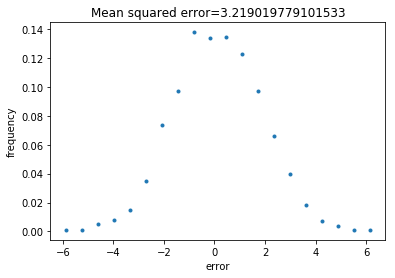

The thetas with which the values were simulated are: [0.12326874 0.11736028 0.05880465 0.10179129 0.12632516 0.05793778
 0.1464215  0.12362359 0.0361242  0.10834281]


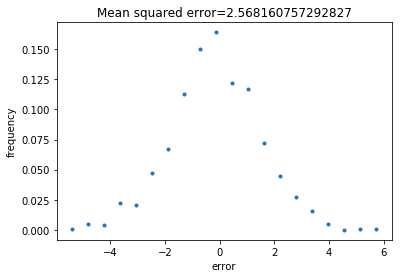

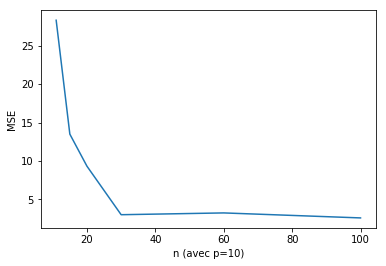

In [16]:
MSE_11_10=GetMSE(11,1000,10)
MSE_15_10=GetMSE(15,1000,10)
MSE_20_10=GetMSE(20,1000,10)
MSE_30_10=GetMSE(30,1000,10)
MSE_60_10=GetMSE(60,1000,10)
MSE_100_10=GetMSE(100,1000,10)



plt.plot([11,15,20,30,60,100],[MSE_11_10,MSE_15_10,MSE_20_10,MSE_30_10,MSE_60_10,MSE_100_10])
plt.xlabel('n (avec p=10)')
plt.ylabel('MSE')
plt.show()
